<a href="https://colab.research.google.com/github/ALZ112/pytorch-Learn/blob/main/torch_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import torch
import numpy as np

In [221]:
a1 = np.random.rand(3,4)
a1.dtype
a1

array([[0.79102595, 0.47329604, 0.78439384, 0.31546767],
       [0.03722838, 0.66119104, 0.40075324, 0.05437392],
       [0.49988191, 0.58455276, 0.60382797, 0.89559032]])

In [222]:
t1 = torch.randn(3,4)
t1

tensor([[ 1.2012, -0.6156, -0.4320, -0.8641],
        [-0.0466,  1.0656, -0.4124,  0.6955],
        [-1.1059, -1.1769, -1.5045,  0.1094]])

In [223]:
torch.randn(2,3,4)

tensor([[[-0.8652, -0.1348,  0.1196, -0.8975],
         [ 0.2366,  2.0916, -0.6246, -0.3784],
         [ 1.0712,  0.6268,  2.3409,  1.3521]],

        [[-0.3136,  0.1017, -2.7757,  0.2645],
         [ 0.4388, -1.9894, -0.2861,  1.7741],
         [-1.8588,  1.7230,  1.7775, -0.0439]]])

In [224]:
torch.zeros(2,3,4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [225]:
t2 = torch.tensor(a1)
t2.dtype

torch.float64

In [226]:
t = torch.arange(10)
t

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [227]:
t = t.reshape(2,5)
t

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [228]:
t = torch.arange(10)
t = t.reshape(-1,2)
t

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [229]:
t = torch.arange(10)
t4 = t.view(2,5)
t4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [230]:
import torch.nn as nn
import torch.nn.functional as F

In [231]:
class Model(nn.Module):
    def __init__(self,in_features = 4,h1 = 8,h2 = 4,out_features = 3):
      super().__init__()
      self.fc1 = nn.Linear(in_features,h1)
      self.fc2 = nn.Linear(h1,h2)
      self.out = nn.Linear(h2,out_features)
    def forward(self,x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)
      return x

In [232]:
torch.manual_seed(41)
model = Model()

In [233]:
import matplotlib.pyplot as plt
import pandas as pd

In [234]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [235]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [236]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [237]:
my_df['species'] = my_df['species'].replace('setosa',0)
my_df['species'] = my_df['species'].replace('versicolor',1)
my_df['species'] = my_df['species'].replace('virginica',2)
my_df.head(5)
my_df.tail(5)

<ipython-input-237-245ef61a8cb6>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2)


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [238]:
x = my_df.drop('species',axis = 1)
y = my_df['species']
x = x.values
y = y.values

In [239]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [240]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [243]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [244]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [245]:
epochs = 200
losses = []

In [246]:
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i%10 == 0:
    print(f'Epoch : {i} and loss {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch : 0 and loss 1.088448405265808
Epoch : 10 and loss 0.9830717444419861
Epoch : 20 and loss 0.7722486853599548
Epoch : 30 and loss 0.5205232501029968
Epoch : 40 and loss 0.37410280108451843
Epoch : 50 and loss 0.2744363844394684
Epoch : 60 and loss 0.191202312707901
Epoch : 70 and loss 0.13202828168869019
Epoch : 80 and loss 0.09574414044618607
Epoch : 90 and loss 0.07420342415571213
Epoch : 100 and loss 0.06104440987110138
Epoch : 110 and loss 0.05251072347164154
Epoch : 120 and loss 0.046586908400058746
Epoch : 130 and loss 0.042218200862407684
Epoch : 140 and loss 0.03883747011423111
Epoch : 150 and loss 0.03612188994884491
Epoch : 160 and loss 0.03387663513422012
Epoch : 170 and loss 0.03197820857167244
Epoch : 180 and loss 0.030346190556883812
Epoch : 190 and loss 0.028921864926815033


Text(0.5, 0, 'Epoch')

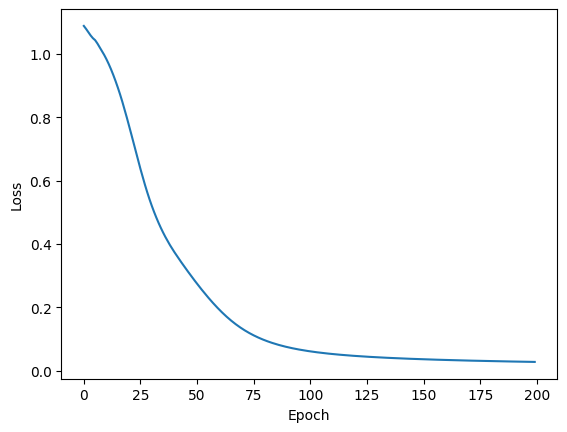

In [247]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [248]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval,y_test)
loss

tensor(0.1367)

In [249]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(x_test):
    y_val = model.forward(data)
    print(f'{i+1}.) {y_val} \t {y_test[i]}')
    if(y_val.argmax().item() == y_test[i]):
      correct += 1
print(f'Accuracy : {correct/len(y_test)}')

1.) tensor([-0.3283, 12.4284, 15.4834]) 	 2
2.) tensor([-3.0386, 13.4113, 22.5897]) 	 2
3.) tensor([-2.4000, 15.6378, 24.1117]) 	 2
4.) tensor([ 3.7002, 13.0434,  7.6203]) 	 1
5.) tensor([-1.2847, 14.2041, 19.8491]) 	 2
6.) tensor([ 5.9679, 13.0586,  2.7635]) 	 1
7.) tensor([ 0.5171, 13.2753, 14.7667]) 	 2
8.) tensor([ 3.8540, 13.1415,  7.4170]) 	 1
9.) tensor([-0.3829, 13.7402, 17.3066]) 	 2
10.) tensor([-3.2509, 14.2612, 24.1513]) 	 2
11.) tensor([ 0.7446, 13.0811, 14.0250]) 	 2
12.) tensor([ 18.9531,  12.4317, -25.9755]) 	 0
13.) tensor([ 17.0360,  11.2409, -23.4011]) 	 0
14.) tensor([ 6.3137, 11.0454, -0.5979]) 	 1
15.) tensor([ 17.1607,  11.9239, -22.7811]) 	 0
16.) tensor([ 1.3545, 13.1976, 12.8648]) 	 2
17.) tensor([ 17.4769,  11.5148, -23.9932]) 	 0
18.) tensor([-0.0178, 12.6705, 15.1306]) 	 1
19.) tensor([ 18.2110,  11.9707, -24.9789]) 	 0
20.) tensor([ 15.8703,  10.5170, -21.8358]) 	 0
21.) tensor([ 6.1763, 11.8449,  0.7370]) 	 1
22.) tensor([-2.2646, 14.4755, 22.3093]) 	 2
2

In [250]:
torch.save(model.state_dict(),'iris_mode.pt')

In [251]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_mode.pt'))

<ipython-input-251-3b6ed6f95293>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_mode.pt'))


<All keys matched successfully>

In [252]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)